# Drawing from Probability Distributions
A key part of any Monte Carlo simulation is drawing random numbers from known distributions. We model certain physical systems according to various statistical behaviors characterized by probability distributions. 

# Drawing from non-uniform random distributions

In the previous section we learned how to generate random numbers from
a uniform probability distribution in an interval $[a,b]$. This
distribution was normalized, so that $$\int _a^b {P(x)dx}=1.$$ Hence, the uniform distribution *by definition* is
$P(x)=1/(b-a)$.

Now, suppose that we generate a sequence $\{x_i\}$ and we take some
function of it to generate $\{y(x_i)\}=\{y_i\}$. This new sequence is
going to be distributed according to some probability density $P(y)$,
such that $$P(y)dy=P(x)dx$$ or $$P(y)=P(x)\frac{dx}{dy}.$$

If we want to generate a desired normalized distribution $P(y)$ from a uniform distribution $P(x)$, we need
to solve the differential equation: $$\frac{dx}{dy}=P(y).$$ But the
solution of this is $$x=\int _0^y {P(y')dy'}=F(y).$$ $F(y)$ is often called the Cumulative Distribution Function (CDF). Therefore,
$$y(x)=F^{-1}(x),$$ where $F^{-1}$ is the inverse of $F$.

### Example: Exponential distribution

As an example, let us take $y(x)=-\ln{(x)}$ with $P(x)$ representing a
uniform distribution in the interval $[0,1]$. Then
$$P(y)=\frac{dx}{dy}=e^{-y},$$ which is distributed exponentially. This
distribution occurs frequently in real problems such as the radioactive
decay of nuclei. You can also see that the quantity $y/\lambda$ has the
distribution $\lambda
e^{-\lambda y}$.




In [ ]:
%matplotlib qt
import pie
pie.piestimator(1000)

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

xlambda = 0.1 
x = -np.log(r)/xlambda

binwidth=xlambda*5

pyplot.hist(x,bins=np.arange(0.,100., binwidth),density=True);
pyplot.plot(np.arange(0.,100.,binwidth),xlambda*np.exp(-xlambda*np.arange(0.,100.,binwidth)),ls='-',c='red',lw=3);
pyplot.show()

### Example: Cauchy (Lorentzian) Distribution

The Cauchy distribution, also known as the Lorentzian distribution in physics, is fundamental to understanding resonance phenomena. It appears in nuclear magnetic resonance, spectral line broadening, and particle physics as the relativistic Breit-Wigner distribution that describes unstable particle masses (as we'll see later in this notebook).

The Cauchy distribution is given by:
$$P(y) = \frac{1}{\pi} \frac{\gamma}{(y-y_0)^2 + \gamma^2}$$

where $y_0$ is the location parameter (the peak position) and $\gamma$ is the scale parameter (half-width at half-maximum). This distribution is notable because it has no defined mean or variance—the integrals diverge!

To generate random numbers from this distribution using the inverse transform method, we need to find the cumulative distribution function and then invert it.

The CDF is:
$$F(y) = \int_{-\infty}^{y} P(y') dy' = \frac{1}{\pi}\arctan\left(\frac{y-y_0}{\gamma}\right) + \frac{1}{2}$$

Setting $F(y) = x$ where $x$ is uniformly distributed on $[0,1]$, we solve for $y$:
$$x = \frac{1}{\pi}\arctan\left(\frac{y-y_0}{\gamma}\right) + \frac{1}{2}$$

$$\pi\left(x - \frac{1}{2}\right) = \arctan\left(\frac{y-y_0}{\gamma}\right)$$

$$\frac{y-y_0}{\gamma} = \tan\left[\pi\left(x - \frac{1}{2}\right)\right]$$

Therefore:
$$y(x) = y_0 + \gamma \tan\left[\pi\left(x - \frac{1}{2}\right)\right]$$

This is our transformation from uniform random numbers $x$ to Cauchy-distributed random numbers $y$.


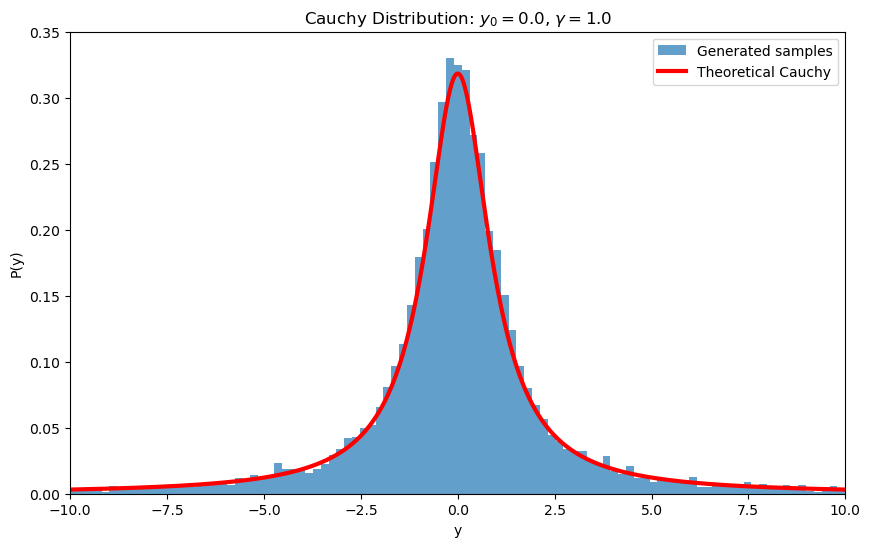

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

N = 10000
# draw from a uniform distribution
r = np.random.random(N) 

# Parameters for Cauchy distribution
y0 = 0.0     # location (peak position)
gamma = 1.0  # scale (half-width at half-maximum)

# Apply inverse transform
y = y0 + gamma * np.tan(np.pi * (r - 0.5))

# Plot histogram with theoretical curve
# Note: we clip the range for visualization since Cauchy has heavy tails
plot_range = np.linspace(-10, 10, 1000)
theoretical = (1/np.pi) * gamma / ((plot_range - y0)**2 + gamma**2)

pyplot.figure(figsize=(10, 6))
pyplot.hist(y, bins=np.linspace(-10, 10, 100), density=True, alpha=0.7, label='Generated samples')
pyplot.plot(plot_range, theoretical, 'r-', lw=3, label='Theoretical Cauchy')
pyplot.xlim(-10, 10)
pyplot.ylim(0, 0.35)
pyplot.xlabel('y')
pyplot.ylabel('P(y)')
pyplot.legend()
pyplot.title(f'Cauchy Distribution: $y_0={y0}$, $\\gamma={gamma}$')
pyplot.show()

**Physical Interpretation:** In spectroscopy, $y$ would represent the frequency or energy of an emitted photon, $y_0$ is the resonance frequency, and $\gamma$ is related to the natural linewidth and lifetime of the excited state through the energy-time uncertainty relation $\Delta E \cdot \tau \sim \hbar$, where $\tau \sim 1/\gamma$. The heavy tails of the Cauchy distribution (much heavier than a Gaussian) reflect the quantum mechanical uncertainty in energy for short-lived states.

**Special Note:** The Cauchy distribution doesn't have a well-defined mean. We can see that if we try to calculate a mean for larger and larger samples.

In [2]:
# Watch the "mean" fail to converge
sample_sizes = [100, 1000, 10000, 100000]
for N in sample_sizes:
    r = np.random.random(N)
    y = gamma * np.tan(np.pi * (r - 0.5))
    print(f"N = {N:6d}, 'mean' = {np.mean(y):8.2f}")

N =    100, 'mean' =    -6.01
N =   1000, 'mean' =    -0.11
N =  10000, 'mean' =    -1.12
N = 100000, 'mean' =     2.32


# Drawing random numbers from distributions
You can draw random numbers from known distributions by using a subpackage of `scipy` called [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html) or using the `random` package. `scipy.stats` contains functions relating to statistical tests and statistical distributions, both continuous and discrete. Keep this package in mind!

Here is small program that models the decay of Thallium to Lead.

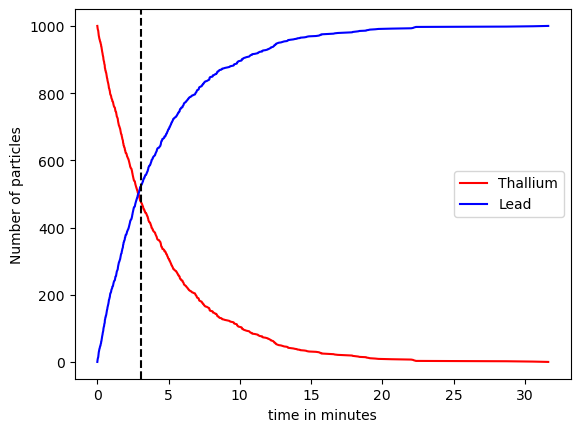

In [4]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as mp
#Script models the decay of 1000 Thallium atoms to lead by drawing from a nonuniform probability distribution
NT = 1000;
NPb = 0
#lifetime of Thallium in minutes
lifetime = 3.053/np.log(2) 

# draw exp distribution to produce a Monte Carlo Simulation
from scipy.stats import expon
#draw from exponential distribution
data_expon = expon.rvs(scale=lifetime,loc=0,size=1000)
#decays happen at random points according to exponential distribution
timepoints = np.sort(data_expon)
Tpoints = np.linspace(NT,0,NT)
Pbpoints = np.linspace(0,NT,NT)
mp.plot(timepoints,Tpoints,'r',label="Thallium")
mp.plot(timepoints,Pbpoints,'b',label="Lead")
mp.axvline(x=lifetime*np.log(2), color='k', linestyle='--')
mp.xlabel("time in minutes")
mp.ylabel("Number of particles")
mp.legend()
mp.show()

# Particle Physics
Many of the particles produced at accelerators like the Large Hadron Collider (LHC), Fermilab, and the Relativistic Heavy Ion Collider (RHIC) are classified as "resonances". In practical terms resonances are just unstable particles, that is particles that decay. These resonances are subject to the energy-time uncertainty principle $$\Delta E \Delta t \sim \hbar$$ that is, the mass of resonances take a range of possible values depending on their lifetime. 

The mass values of resonances are modeled using a Breit-Wigner distribution:
$$f(E) = \frac{k}{(E^2-M^2)^2 + \Gamma^2 M^2}$$
where
$$k = \frac{2\sqrt{2}M\Gamma\gamma}{\pi(M^2+\gamma)},\quad \gamma = \sqrt{M^2(M^2+\Gamma^2)}$$
where *E* is the center of mass energy of the collision, *M* the central mass of the resonance, and $\Gamma$ is the decay width where the lifetime, $\tau$ is $$\tau = \frac{\hbar}{\Gamma}.$$

This should look familiar! The Breit-Wigner distribution is closely related to the Cauchy distribution we saw earlier. In fact, in the non-relativistic limit (when $E \approx M$), the Breit-Wigner reduces to a Cauchy distribution centered at $M$ with width $\Gamma$. This connection makes physical sense: both describe resonance phenomena where the uncertainty principle relates the width of the distribution to the lifetime of the state. Just as we saw that the Cauchy distribution has heavy tails and no defined mean, particle resonances can show up at energies significantly far from their central mass value due to quantum uncertainty.

The package `scipy.stats` contains functions that allow us to draw from Breit-Wigner distributions. This allows us to produce monte carlo simulations of particle interactions, compare the simulations to data, and determine whether physical theories are failing to describe some phenomena.

In [5]:
#magic command to force display of graphics 
%matplotlib inline
import numpy as np
from scipy.stats import rel_breitwigner
import matplotlib.pyplot as mp

In [6]:
#For the Z0 boson
M = 91.1876 #GeV
gamma = 2.4952 #GeV
#the rel_breitwigner distribution takes two parameters
rZ = rel_breitwigner.rvs(M/gamma,scale = gamma, size=1000)
print(rZ)

[ 91.48848515  89.99191243  89.38248432  89.60110548  91.24994122
  77.62406677  89.70593374  87.61645926  90.86083764  91.00405985
  92.09815888  90.62613386  85.83147417  11.42765976  92.14417132
  92.57207111 102.14769326  90.64296157  91.86900607  90.36650915
  92.55413834  91.51473164  91.7603388   91.49219222  91.42780932
  90.19192742  91.14438579  98.56589193  97.14988055  95.3196352
  90.817881    91.52817099  91.3364397   89.53883664  83.66017579
  90.18736282  91.24588022  96.27719716  90.65848294  91.80343464
  92.20946034  63.64631617  89.01732762  89.34482914  90.52317891
  88.2785356   93.8608315   92.57106965  91.20388259  87.73404673
  91.73395099  94.22952783  97.49686388  93.77050428  92.21604016
  84.34941791  86.53417461  90.90350986  91.42141983  93.25509993
  91.1923951   90.6536514  100.06053515  87.48263046  92.52019319
  93.51355057  91.52110075  92.37448677  91.88610785  89.20747863
  90.47984194  90.27411258  92.3373601   92.09552443  89.16399501
  89.867039

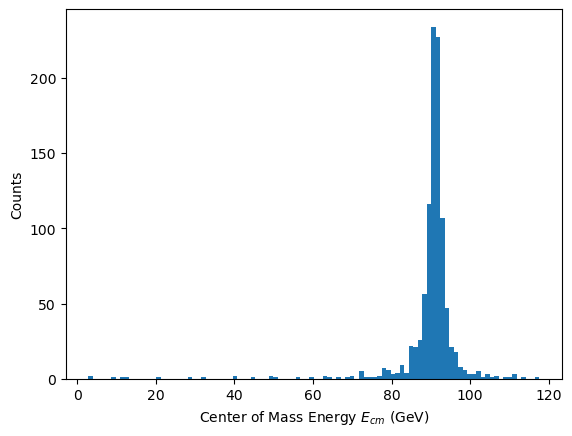

In [7]:
mp.hist(rZ,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

In [8]:
# For the Higgs boson
mass = 125.3 #GeV
width = 0.004 #GeV
rho =mass/width
sc = width
rH = rel_breitwigner.rvs(rho,scale =sc, size=1000)
print(rH)

[125.30345352 125.30468726 125.30073465 125.29805012 125.30086714
 125.30232383 125.32337673 125.29595518 125.25151265 125.3000015
 125.28972449 125.29256331 125.29897361 125.29035687 125.29512705
 125.30057184 125.30072835 125.30127032 125.29923428 125.30248723
 125.30054691 125.29910541 125.29718393 125.29164588 125.29958916
 125.31093727 125.30916185 125.3125543  125.30356916 125.3388889
 125.30224717 125.2991725  125.28995822 125.29336363 125.29842856
 125.29692284 125.29752673 125.04226505 125.3014547  125.30010855
 125.29894195 125.3072941  125.3004082  125.30856439 125.30342482
 125.29760729 125.29952918 125.29720351 125.29715656 125.30076052
 125.29641776 125.30429287 125.32005746 125.30058785 125.29841274
 125.32102401 125.2999639  125.30380176 125.29933869 125.30176579
 125.29859078 125.28377156 125.30008838 125.30583724 125.30117871
 125.29875323 125.30162491 125.30298007 125.29918616 125.32524766
 125.30051001 125.30358706 125.296093   125.29558068 125.30789762
 125.2998310

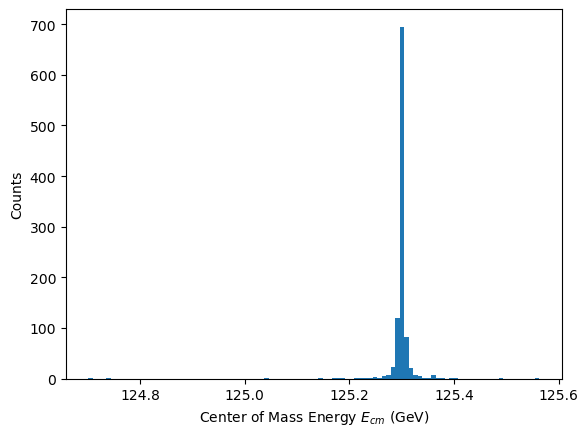

In [9]:
mp.hist(rH,bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

In [10]:
#combine random lists
rT = np.concatenate((rZ,rH),axis=None)
print(rT)

[ 91.48848515  89.99191243  89.38248432 ... 125.30412523 125.29979413
 125.29195839]


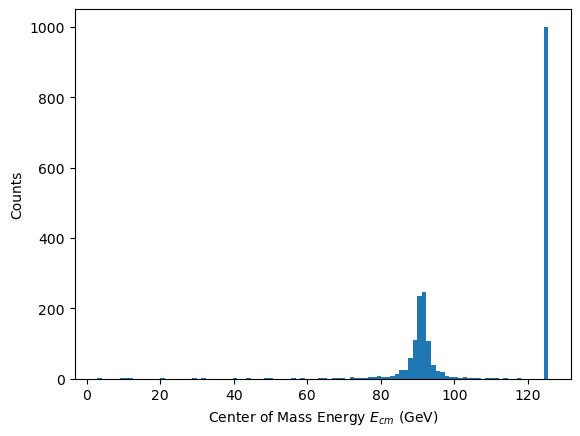

In [11]:
#what the reconstruction from accelerator detectors would look like in an ideal world
mp.hist(rT, bins=100)
mp.xlabel('Center of Mass Energy $E_{cm}$ (GeV)')
mp.ylabel('Counts')
mp.show()

## The key difference between `random` and `numpy.random` and `scipy.stats`
You can draw from the same distributions whether using the `random`, `numpy.random`, or the `scipy.stats` package. The difference comes down to convenience. 'random' package functions tend to only draw 1 number at a time. 

In [12]:
import random as rn
rn.expovariate(lambd = 9)

0.0037753399537585144

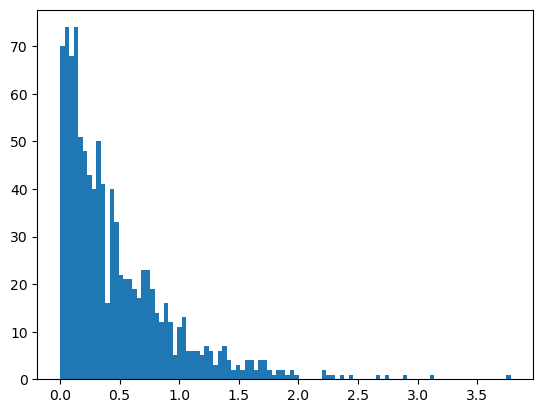

In [13]:
#More machinary is needed to get multiple numbers from expovariate
exp = []
for k in range(1, 1000):
    rando = rn.expovariate(lambd=2)
    exp.append(rando)
mp.hist(exp,bins=100)
mp.show()

# Exercise: Radioactive Decay Simulation

## Background
Carbon-14 is a radioactive isotope used in radiocarbon dating. It has a half-life of 5,730 years. You'll simulate the decay of a sample of C-14 atoms to explore exponential distributions and compare different methods of generating random numbers from distributions.

## Part 1: Manual Transformation Method

**Task:** Generate an exponential distribution using the transformation method from uniform random numbers.

1. Create 5000 uniform random numbers between 0 and 1 using `np.random.random()`
2. Calculate the mean lifetime: τ = 5730/ln(2) years (you'll need `np.log()` for natural log)
3. Transform them to follow an exponential distribution using the formula: `t = -τ * ln(r)`
4. Create a histogram with 50 bins showing the distribution of decay times
5. Add appropriate axis labels ("Time (years)" and "Number of Decays")

**Questions to consider:**
- What does the shape of this distribution tell you about when most decays occur?

## Part 2: Using scipy.stats and Comparison

**Task:** Generate the same exponential distribution using `scipy.stats.expon` and compare

1. Import `expon` from `scipy.stats`
2. Generate 5000 random decay times using `expon.rvs()` with the appropriate `scale` parameter (scale = τ)
3. On the **same plot** as Part 1, add this new histogram with a different color and some transparency (use `alpha=0.5`)
4. Add a legend to distinguish the two methods

**Questions to consider:**
- How do the two histograms compare?
- Which method is more convenient? When might you prefer the manual transformation approach?

## Helpful Code Snippets
```python
# Imports you'll need
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as mp

# Creating overlapping histograms
mp.hist(data1, bins=50, alpha=0.5, label='Manual transformation', color='blue')
mp.hist(data2, bins=50, alpha=0.5, label='scipy.stats', color='red')
mp.legend()
```

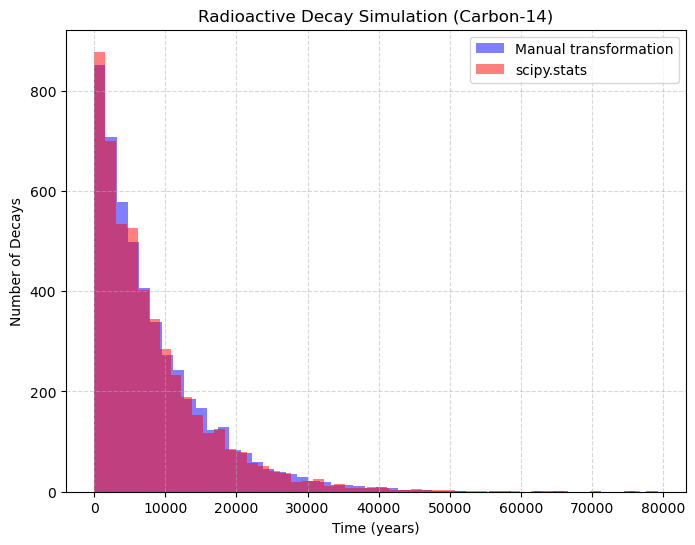

In [18]:
# Imports you'll need
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as mp

r = np.random.random(5000)
t = 5730 / np.log(2)
data1 = -t * np.log(r)
data2= expon.rvs(scale=t, size=5000)
mp.figure(figsize=(8, 6))
mp.hist(data1, bins=50, alpha=0.5, label='Manual transformation', color='blue')
mp.hist(data2, bins=50, alpha=0.5, label='scipy.stats', color='red')
mp.legend()
mp.xlabel("Time (years)")
mp.ylabel("Number of Decays")
mp.title("Radioactive Decay Simulation (Carbon-14)")
mp.legend()
mp.grid(True, linestyle='--', alpha=0.5)
mp.show()